### Import libraries

In [85]:
import random
import networkx as nx
import numpy as np
from community import community_louvain
import matplotlib.pyplot as plt

### Create function to make a network by random data

In [86]:
def generate_network(n):
    # initialize dictionary with nodes
    graph_dct = {node:[] for node in range(n)}
    nodes = list(range(n))
    
    # generate edges
    for n,edge_list in graph_dct.items():
        edge_c = random.randint(min(nodes), int(max(nodes) / 2))
        el = random.sample(nodes, edge_c)
        graph_dct[n] = el
        
    # create networkx multi-edge graph
    G = nx.MultiGraph(graph_dct)
    return G

### Visualize the network

MultiGraph with 20 nodes and 40 edges


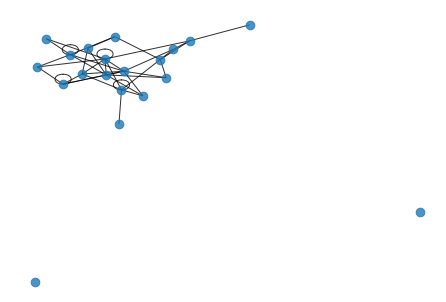

In [87]:
n = 20 # number of nodes
G = generate_network(n) # generate graph
print(nx.info(G))

# visualize graph
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8)
plt.show()

### Run Louvain algorithm to find communities

In [88]:
comms = community_louvain.best_partition(G)
unique_coms = np.unique(list(comms.values()))
print(unique_coms)

[0 1 2 3 4 5 6]


### Visualize the community

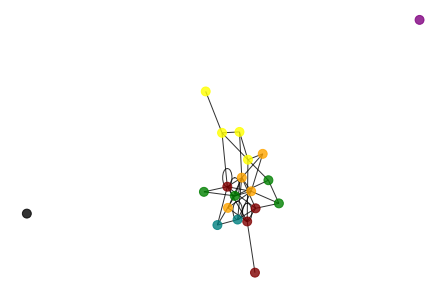

In [89]:

cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow',
    6 : 'purple',
    7 : 'pink',
    8 : 'brown',
    9 : 'grey',
    10 : 'red',
    11 : 'blue',
    12 : 'cyan',
}

node_cmap = [cmap[v] for _,v in comms.items()]

pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 80, alpha = 0.8, node_color=node_cmap)
plt.show()